In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imdb-indian-movies-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1767670%2F2885618%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241008%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241008T201352Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07e3c5f598c0eed340deff138c80730fa0564830e05e1aa40e048ea827e1dbb8fcd2ca627e4e4c5dde54043be9338cb31e492a93aedd143ed473deba0acb4de00bec3350cba6b437f1cd24735c0d1d03358b241b96c66b1608dd4139c19898fb69bbe408cac62accbb5382188fe5183d9e25e900485729a13ed0dc0808905e9caa91f57ba700a5002cb7a8e0aa61a993559fb483e3e183ff365de469421bf5880f34f5cff4091de92f93ddbcf802f8dbcf28277d1439fe92a4edb31d838b0596cbad416ee6d5fc2f3b84961a413e3d298db7c545aeec058c2c727c9fee5916b2828d55ca396549decfa0deac570b8b61fe1ab795f4dd5f803d176b89e4eb7fd3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 212902 bytes downloaded
Downloaded and uncompressed: imdb-indian-movies-dataset
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data_Set=pd.read_csv("/kaggle/input/imdb-indian-movies-dataset/movies_data.csv")

In [ ]:
data_Set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [ ]:
data_Set.shape

(5659, 10)

In [ ]:
data_Set.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
data_Set.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
data_Set.duplicated().sum()

0

In [ ]:
data_Set.dropna(inplace=True)

In [ ]:
data_Set.drop_duplicates(inplace=True)

In [ ]:
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 442.2+ KB


In [ ]:
data_Set

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
data_Set.duplicated().sum()

0

In [ ]:
data_Set['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1947, 1931, 1933, 1943, 1944,
       1932, 1939, 1934])

In [ ]:
data_Set['Duration'].unique()

array([109, 110, 147, 142,  82, 116,  96, 120, 161, 166, 102,  87, 132,
       105, 146, 168, 158, 126,  94, 138, 124, 144, 157, 136, 107, 113,
        80, 122, 149, 148, 130, 121, 188, 115, 103, 114, 170, 100,  99,
       140, 128,  93, 125, 145,  75, 111, 134, 104,  92, 137, 127, 119,
       135,  90, 150, 151,  95, 112, 143, 177, 117, 123,  72, 154, 175,
       153,  78, 139, 133, 180,  46, 164, 162, 171, 160, 152, 163, 165,
       141, 129, 156, 240, 172,  88, 155, 167, 106, 193, 108, 195, 174,
        81, 178,  58, 184,  97, 176, 169, 131,  77,  91,  86,  84, 173,
       118, 181, 300,  70, 101,  79,  65,  48, 183, 159,  83,  68,  89,
       201,  64, 186,  74,  85,  98,  49,  60, 207,  76, 185,  59, 187,
       216,  51,  71,  45,  73,  57, 191, 321, 199, 179,  47, 206,  63,
       211, 247,  56, 213, 210, 190, 223, 189, 224, 202,  69, 255, 197,
       182,  66, 214, 208,  21, 200, 192,  50,  54, 238,  62,  67,  52,
       204, 235, 217,  61, 250])

In [ ]:
data_Set['Votes'].unique()

array([    8,    35,   827, ..., 70344,   408,  1496])

In [ ]:
data_Set['Genre'].unique()


array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [ ]:
data_Set["Genre"]=data_Set["Genre"].str.split(",").explode("Genre").reset_index(drop=True)

In [ ]:
data_Set['Genre'].unique()

array(['Drama', 'Comedy', ' Romance', ' Drama', ' Musical', ' War',
       'Horror', ' Mystery', ' Thriller', 'Action', ' Crime', 'Crime',
       ' Horror', ' History', 'Thriller', 'Adventure', ' Sci-Fi', 'Sport',
       'Biography', ' Family', ' Comedy', ' Adventure', ' Fantasy',
       'Documentary', ' Biography', 'Mystery', 'Musical', 'Romance',
       'Fantasy', ' Music', 'Sci-Fi', 'Family', 'History', ' Sport',
       'Animation', ' Action', 'War', ' News', 'Music', ' Western'],
      dtype=object)

In [ ]:
data_Set.shape

(5659, 10)

In [ ]:
data_Set.nunique()

,0
Name,5385
Year,91
Duration,174
Genre,40
Rating,83
Votes,2027
Director,2431
Actor 1,1960
Actor 2,2321
Actor 3,2556


In [ ]:
data_Set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,1997,147,Romance,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,2005,142,Comedy,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,2012,82,Drama,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
data_Set.sort_values(by="Rating",ascending=False,inplace=True)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

<function matplotlib.pyplot.show(close=None, block=None)>

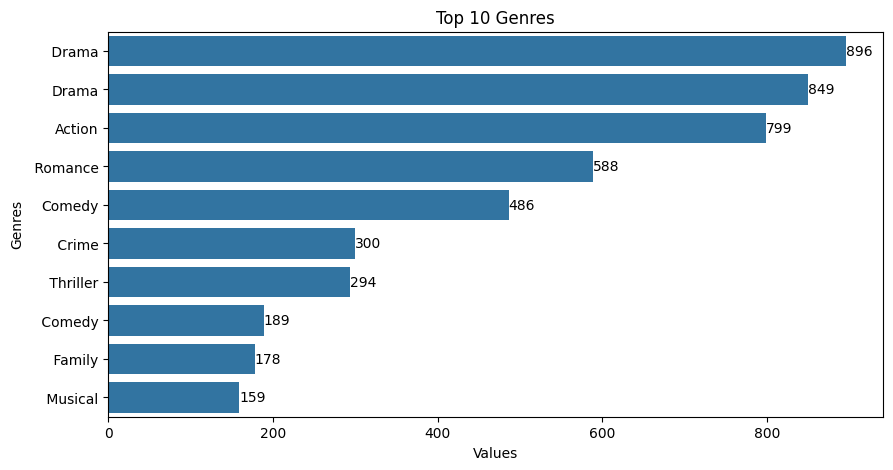

In [ ]:
top10_genres=data_Set["Genre"].value_counts().head(10)
plt.figure(figsize=(10,5))
bar=sns.barplot(y=top10_genres.index,x=top10_genres.values)
bar.bar_label(bar.containers[0])
plt.ylabel("Genres")
plt.xlabel("Values")
plt.title("Top 10 Genres")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

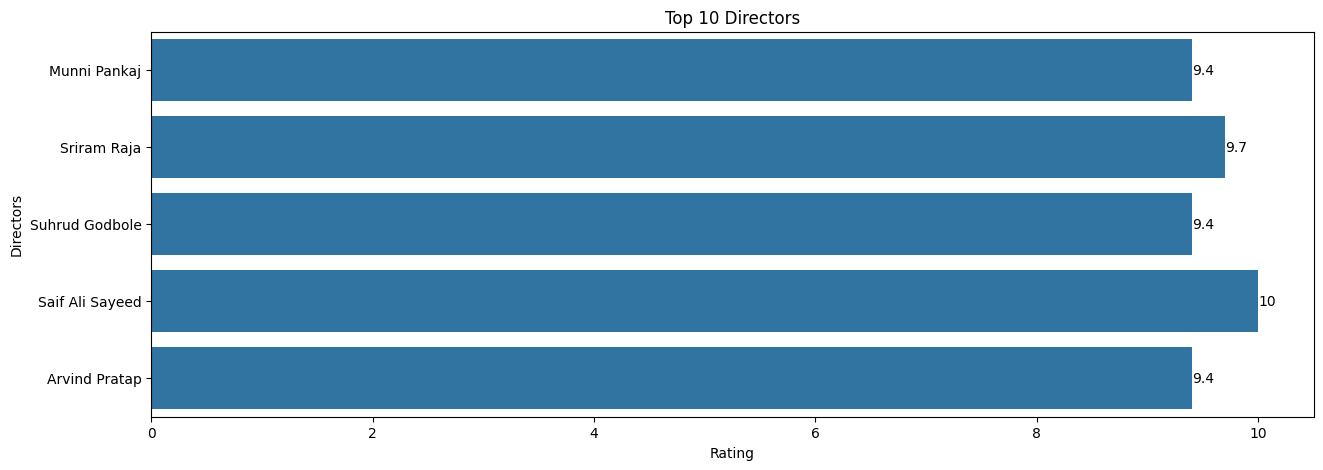

In [ ]:
top10_directors=data_Set["Director"].head()
plt.figure(figsize=(15,5))
bar1=sns.barplot(y=top10_directors, x=data_Set["Rating"])
bar1.bar_label(bar1.containers[0])
bar1.set_ylabel("Directors")
bar1.set_xlabel("Rating")
bar1.set_title("Top 10 Directors")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

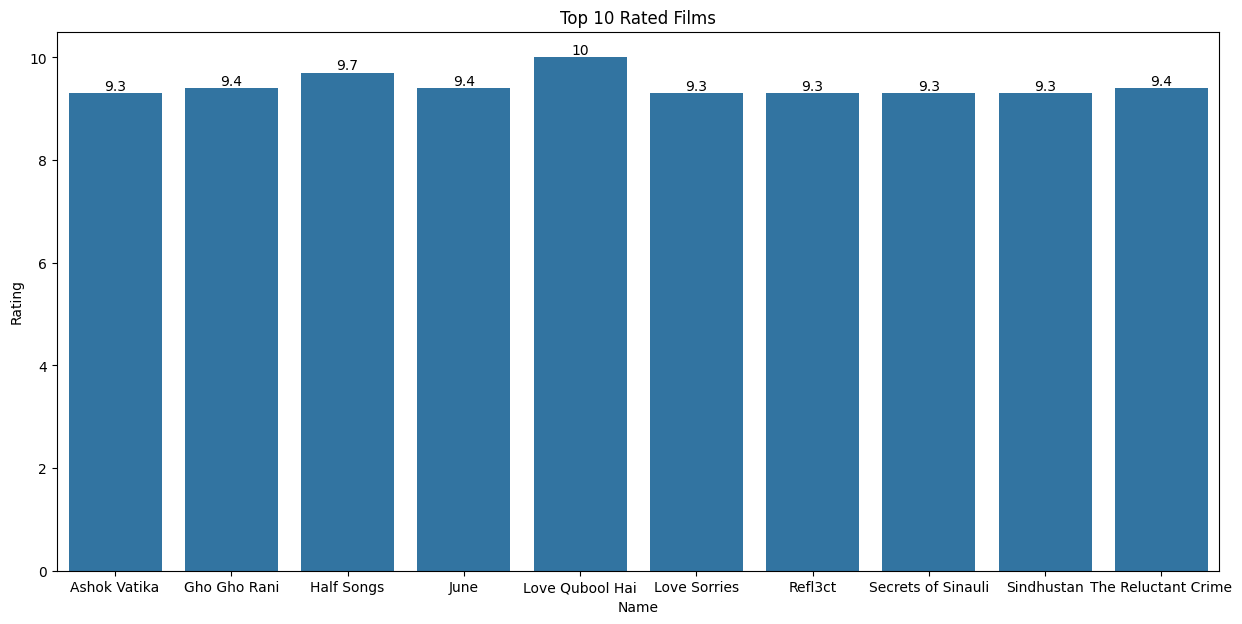

In [ ]:
top10_rated_films=data_Set["Name"].head(10)
plt.figure(figsize=(15,7))
bar2=sns.barplot(x=top10_rated_films,y=data_Set["Rating"])
bar2.bar_label(bar2.containers[0])
bar2.set_xlabel("Name")
bar2.set_ylabel("Rating")
bar2.set_title("Top 10 Rated Films")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

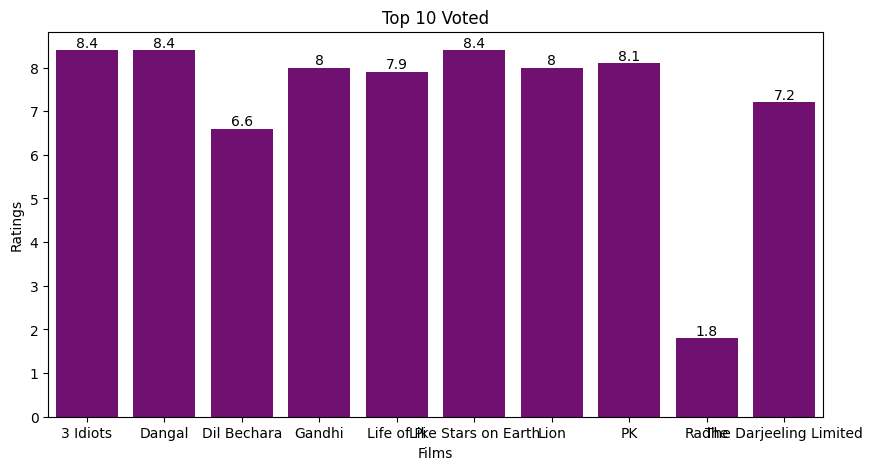

In [ ]:
data_Set.sort_values(by="Votes",ascending=False,inplace=True)
top10_voted=data_Set["Name"].head(10)
plt.figure(figsize=(10,5))
bar3=sns.barplot(x=top10_voted,y=data_Set["Rating"],color="purple")
bar3.bar_label(bar3.containers[0])
bar3.set_xlabel("Films")
bar3.set_ylabel("Ratings")
bar3.set_title("Top 10 Voted")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

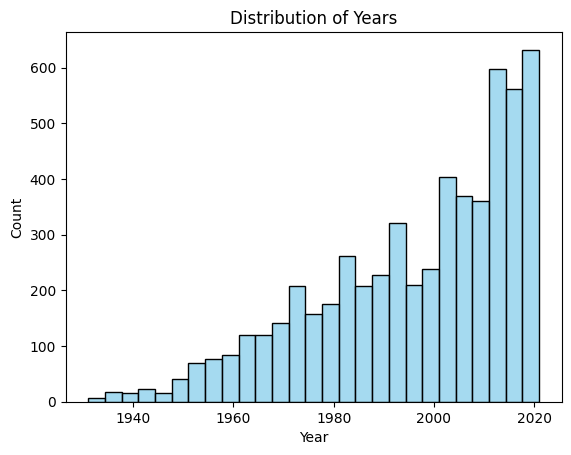

In [ ]:
sns.histplot(x=data_Set["Year"],color="skyblue")
plt.title("Distribution of Years")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

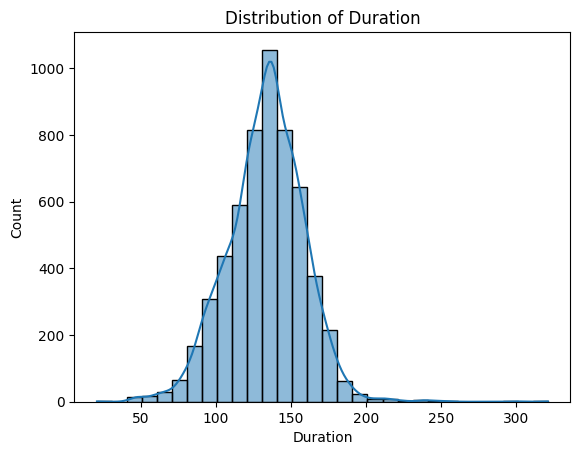

In [ ]:
sns.histplot(x=data_Set["Duration"],kde=True,bins=30)
plt.title("Distribution of Duration")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

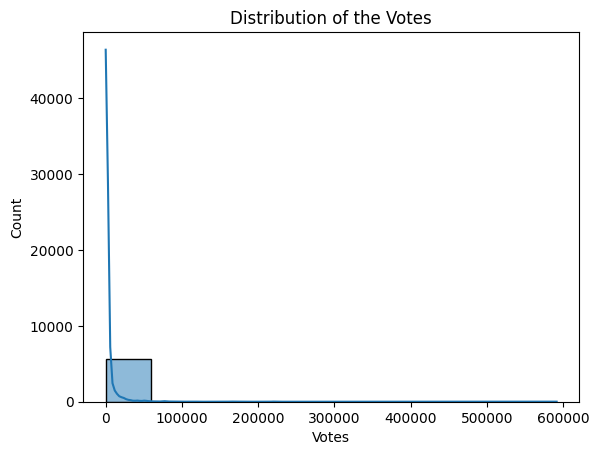

In [ ]:
sns.histplot(x=data_Set["Votes"],kde=True,bins=10)
plt.title("Distribution of the Votes")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

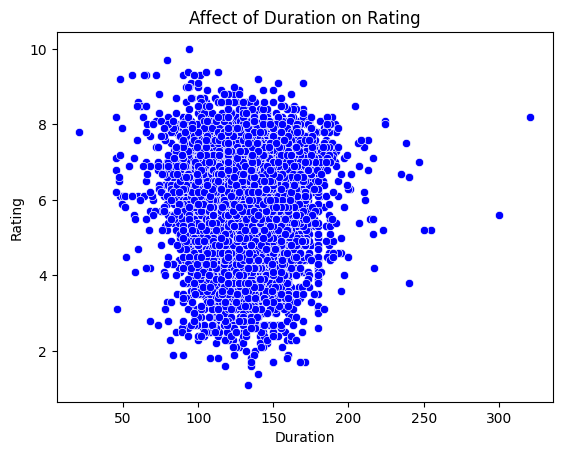

In [ ]:
sns.scatterplot(x=data_Set["Duration"],y=data_Set["Rating"],color="blue")
plt.title("Affect of Duration on Rating")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

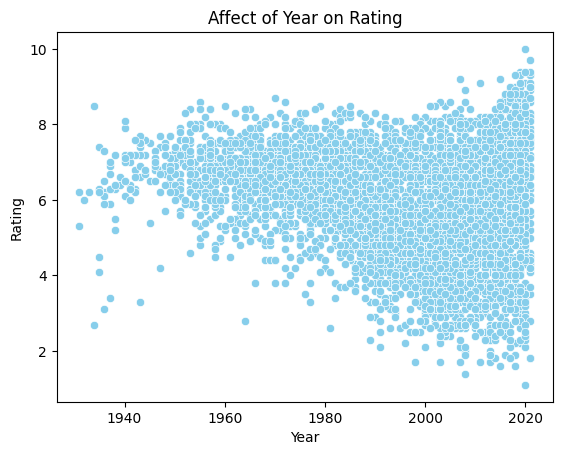

In [ ]:
sns.scatterplot(x=data_Set["Year"],y=data_Set["Rating"],color="skyblue")
plt.title("Affect of Year on Rating")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

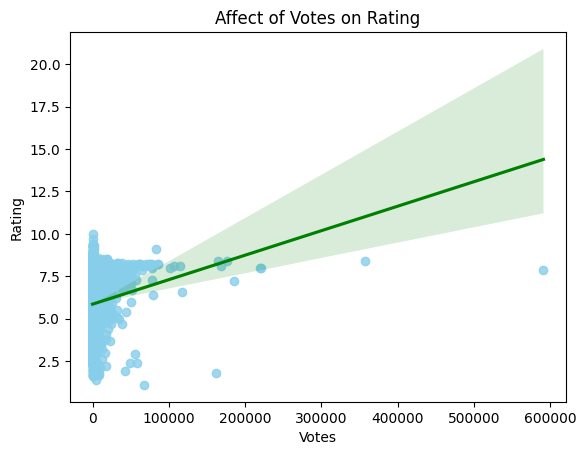

In [ ]:
sns.regplot(x=data_Set["Votes"],y=data_Set["Rating"],line_kws=dict(color="green"),scatter_kws=dict(color="skyblue"))
plt.title("Affect of Votes on Rating")
plt.show

In [ ]:
data_Set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3088,Life of Pi,2012,127,Romance,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
44,3 Idiots,2009,170,Horror,8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3094,Lion,2016,118,Comedy,8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
1823,Gandhi,1982,191,Drama,8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
5096,The Darjeeling Limited,2007,91,Romance,7.2,185127,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman


In [ ]:
data_Set["Genre"]=data_Set.groupby("Genre")["Rating"].transform("mean")
data_Set["Director"]=data_Set.groupby("Director")["Rating"].transform("mean")
data_Set["Actor 1"]=data_Set.groupby("Actor 1")["Rating"].transform("mean")
data_Set["Actor 2"]=data_Set.groupby("Actor 2")["Rating"].transform("mean")
data_Set["Actor 3"]=data_Set.groupby("Actor 3")["Rating"].transform("mean")
data_Set["Name"]=data_Set.groupby("Name")["Rating"].transform("mean")


In [ ]:
data_Set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3088,7.9,2012,127,5.966156,7.9,591417,7.90,7.900000,5.807143,7.525
44,8.4,2009,170,5.815152,8.4,357889,8.06,6.827273,6.257143,8.400
3094,8.0,2016,118,5.875926,8.0,220526,8.00,7.800000,8.000000,8.000
1823,8.0,1982,191,5.806696,8.0,220118,8.00,8.000000,8.000000,7.075
5096,7.2,2007,91,5.966156,7.2,185127,7.20,5.650000,7.200000,7.200


In [ ]:
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 3088 to 3146
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   float64
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   float64
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   float64
 7   Actor 1   5659 non-null   float64
 8   Actor 2   5659 non-null   float64
 9   Actor 3   5659 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 615.4 KB


In [ ]:
features=data_Set.drop("Rating",axis=1)
target=data_Set["Rating"]

<function matplotlib.pyplot.show(close=None, block=None)>

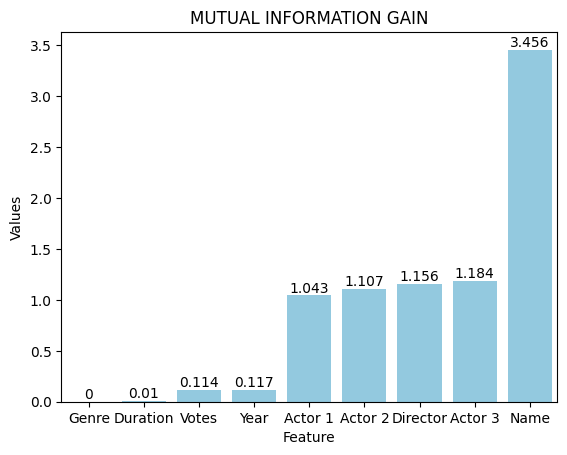

In [ ]:
values=mutual_info_regression(features,target)
mutual_info=pd.Series(values)
mutual_info.index=features.columns
df=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df.sort_values(ascending=True,by="Values",inplace=True)
df["Values"]=df["Values"].round(3)
bar2=sns.barplot(x="Feature",y="Values",data=df,color="skyblue")
bar2.bar_label(bar2.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show

hsv,gist_rainbow,RdBu,viridis,PiYg are some color maps

<function matplotlib.pyplot.show(close=None, block=None)>

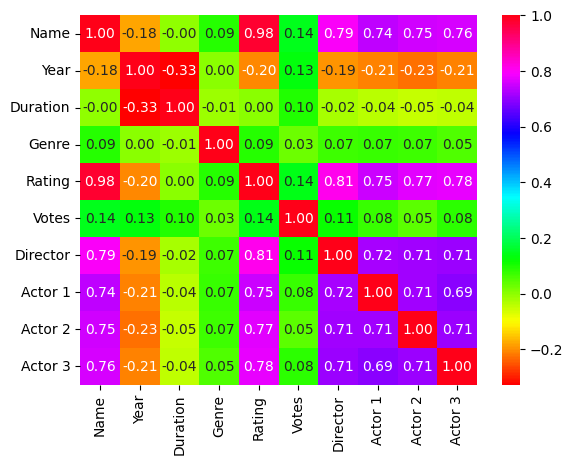

In [ ]:
sns.heatmap(data_Set.corr(),annot=True,fmt=".2f",cmap="hsv")
plt.show

In [ ]:
data_Set.drop("Duration",axis=1,inplace=True)

In [ ]:
features=data_Set.drop("Rating",axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,train_size=0.8,random_state=38)

In [ ]:
a=y_train.shape
b=x_train.shape
print(a,b)

(4527,) (4527, 8)


In [ ]:
a=y_test.shape
b=x_test.shape
print(a,b)

(1132,) (1132, 8)


model training


In [ ]:
model_data=LinearRegression()
model_data.fit(x_train,y_train)
pred_model=model_data.predict(x_test)

mean square error

In [ ]:
mse=mean_squared_error(pred_model,y_test)
round(mse,2)

0.07

r squared value

In [ ]:
score=r2_score(pred_model,y_test)
(score,2)

(0.9615101222992645, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

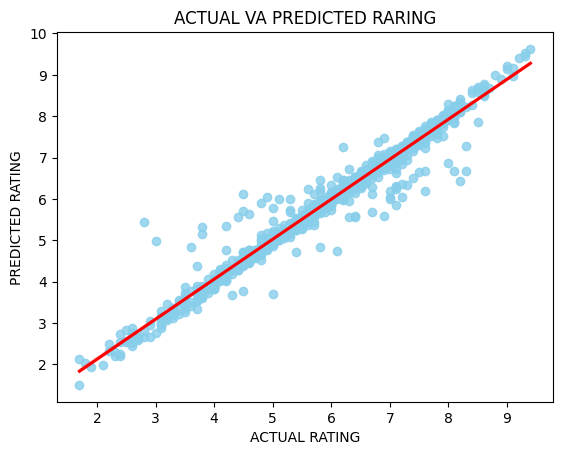

In [ ]:
sns.regplot(x=y_test,y=pred_model,line_kws=dict(color="red"),scatter_kws=dict(color="skyblue"))
plt.title("ACTUAL VA PREDICTED RARING")
plt.xlabel("ACTUAL RATING")
plt.ylabel("PREDICTED RATING")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

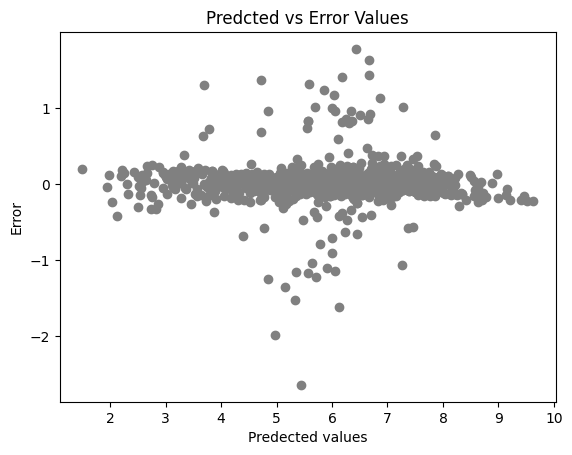

In [ ]:
residual=y_test-pred_model
plt.scatter(x=pred_model,y=residual,c="grey")
plt.xlabel("Predected values")
plt.ylabel("Error")
plt.title("Predcted vs Error Values")
plt.show